Q-4. Imagine you working as a sale manager now you need to predict the Revenue
and whether that particular revenue is on the weekend or not and find the
Informational_Duration using the Ensemble learning algorithm
Dataset This is the Dataset You can use this dataset for this question.


In [1]:
dataset = 'https://www.kaggle.com/datasets/henrysue/online-shoppers-intention'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import six
# from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
# import pydotplus

In [3]:
df = pd.read_csv('online_shoppers_intention.csv')

In [4]:
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [5]:
df.describe(include='all')

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330,12330
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,3,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,May,NaN,NaN,NaN,NaN,Returning_Visitor,False,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3364,NaN,NaN,NaN,NaN,10551,9462,10422
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,NaN,2.124006,2.357097,3.147364,4.069586,NaN,NaN,NaN
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,NaN,0.911325,1.717277,2.401591,4.025169,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,NaN,2.000000,2.000000,1.000000,2.000000,NaN,NaN,NaN
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,NaN,2.000000,2.000000,3.000000,2.000000,NaN,NaN,NaN
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,NaN,3.000000,2.000000,4.000000,4.000000,NaN,NaN,NaN


In [6]:
df['Weekend'].value_counts()

False    9462
True     2868
Name: Weekend, dtype: int64

In [7]:
df['Revenue'].value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

We can see that the dataset is imbalanced. Let's use hybrid sampling method to convert it into a balanced dataset.

### Hybrid sampling
Hybrid sampling methods aim to strike a balance between the various sampling techniques to create a dataset that captures the characteristics of all classes while minimizing bias and improving model generalization. Some common sampling techniques that can be combined in hybrid approaches include:

Under-sampling: Removing instances from the majority class to balance the class distribution. Hybrid approaches might use variations of under-sampling methods to avoid excessive loss of information.

Over-sampling: Replicating instances from the minority class to balance the class distribution. Hybrid approaches can use modified over-sampling techniques to avoid overfitting.

First balancing for label_1 i.e. Weekend label:-

In [8]:
class_WT = df[df['Weekend']==True]
class_WF = df[df['Weekend']==False]

In [9]:
class_WT['Weekend'].value_counts()

True    2868
Name: Weekend, dtype: int64

In [10]:
class_WF['Weekend'].value_counts()

False    9462
Name: Weekend, dtype: int64

In [11]:
df.shape[0]

12330

In [12]:
class_WF_downsampled = resample(class_WF,
                          replace=True, # sample with replacement
                          n_samples=round(df.shape[0]/2), # create half of the dataset
                          random_state=27) # reproducible results

In [13]:
class_WT_upsampled = resample(class_WT,
                          replace=True, # sample with replacement
                          n_samples=round(df.shape[0]/2), # create half of the dataset
                          random_state=27) # reproducible results

In [14]:
data_balanced = pd.concat([class_WF_downsampled,class_WT_upsampled])
data_balanced

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
6652,0,0.0,0,0.0,15,598.600000,0.000000,0.033333,0.000000,0.0,Jul,2,2,1,2,Returning_Visitor,False,False
4888,5,105.5,0,0.0,16,733.252381,0.000000,0.006863,0.000000,0.0,May,3,2,1,6,New_Visitor,False,False
5059,1,9.0,1,82.0,93,3148.173939,0.021875,0.039475,3.323971,0.4,May,3,2,8,13,Returning_Visitor,False,False
6279,0,0.0,0,0.0,3,35.400000,0.000000,0.066667,0.000000,0.0,Nov,1,1,1,1,Returning_Visitor,False,False
9287,0,0.0,0,0.0,9,125.500000,0.007407,0.022222,0.000000,0.0,Nov,3,2,4,2,Returning_Visitor,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7583,4,103.6,1,27.2,26,2609.000000,0.000000,0.002381,47.124546,0.0,Nov,2,6,1,2,Returning_Visitor,True,True
11271,2,32.5,0,0.0,3,39.000000,0.040000,0.026667,0.000000,0.0,Dec,1,1,1,2,Returning_Visitor,True,False
8163,0,0.0,0,0.0,14,267.250000,0.000000,0.021429,0.000000,0.0,Nov,3,2,1,11,New_Visitor,True,False
9522,0,0.0,0,0.0,91,2056.106981,0.008889,0.023937,0.000000,0.0,Nov,2,2,1,2,Returning_Visitor,True,False


In [15]:
# shuffle the DataFrame rows
data_balanced = data_balanced.sample(frac = 1)
data_balanced= data_balanced.reset_index(drop=True)

Now balancing for label_2, i.e. Revenue label :-

In [16]:
data_balanced['Revenue'].value_counts()

False    10321
True      2009
Name: Revenue, dtype: int64

In [17]:
class_RT = data_balanced[data_balanced['Revenue']==True]
class_RF = data_balanced[data_balanced['Revenue']==False]
print(class_RT['Revenue'].value_counts())
print(class_RF['Revenue'].value_counts())

True    2009
Name: Revenue, dtype: int64
False    10321
Name: Revenue, dtype: int64


In [18]:
class_RF_downsampled = resample(class_RF,
                          replace=True, # sample with replacement
                          n_samples=round(df.shape[0]/2), # create half of the dataset
                          random_state=27) # reproducible results

class_RT_upsampled = resample(class_RT,
                          replace=True, # sample with replacement
                          n_samples=round(df.shape[0]/2), # create half of the dataset
                          random_state=27) # reproducible results

In [19]:
data_balanced2 = pd.concat([class_RF_downsampled,class_RT_upsampled])
data_balanced2

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
6169,9,307.360119,4,77.916667,95,2989.780952,0.005882,0.014514,12.740393,0.0,Nov,3,2,4,1,Returning_Visitor,True,False
4515,0,0.000000,0,0.000000,9,478.000000,0.000000,0.011111,0.000000,0.0,Mar,3,2,2,3,Returning_Visitor,True,False
4683,1,30.866667,3,7.000000,15,398.256667,0.000000,0.025000,0.000000,0.0,Nov,1,1,3,2,Returning_Visitor,False,False
5820,2,11.500000,0,0.000000,12,1562.000000,0.023000,0.042941,33.112800,0.8,May,2,2,1,1,Returning_Visitor,False,False
8614,5,74.250000,2,84.000000,37,1599.083333,0.000000,0.006579,0.000000,0.0,Mar,2,2,4,1,Returning_Visitor,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1831,1,26.200000,0,0.000000,32,1427.676667,0.000000,0.021875,19.965636,0.0,Sep,2,4,3,4,Returning_Visitor,False,True
5239,5,419.000000,0,0.000000,14,362.102982,0.022917,0.021979,3.164088,0.0,Jul,3,2,3,2,Returning_Visitor,True,True
11633,1,206.000000,2,69.500000,65,1140.791667,0.000000,0.020707,6.641911,0.0,Nov,2,2,4,2,Returning_Visitor,False,True
2248,1,89.000000,0,0.000000,17,1175.500000,0.000000,0.012500,9.740250,0.0,May,1,1,3,4,New_Visitor,True,True


In [20]:
# shuffle the DataFrame rows
data_balanced2 = data_balanced2.sample(frac = 1)
data_balanced2= data_balanced2.reset_index(drop=True)

We have balanced our datasets for both of the labels.

In [21]:
data = data_balanced2.copy()

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [23]:
# Select columns of specific data types
numeric_cols = data.select_dtypes(include=['int', 'float'])

In [24]:
numeric_cols.shape[1]

14

C:\Users\sahus\AppData\Local\Temp\ipykernel_14012\495607023.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numeric_cols[column])
C:\Users\sahus\AppData\Local\Temp\ipykernel_14012\495607023.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numeric_cols[column])
C:\Users\sahus\AppData\Local

C:\Users\sahus\AppData\Local\Temp\ipykernel_14012\495607023.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numeric_cols[column])
C:\Users\sahus\AppData\Local\Temp\ipykernel_14012\495607023.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numeric_cols[column])
C:\Users\sahus\AppData\Local

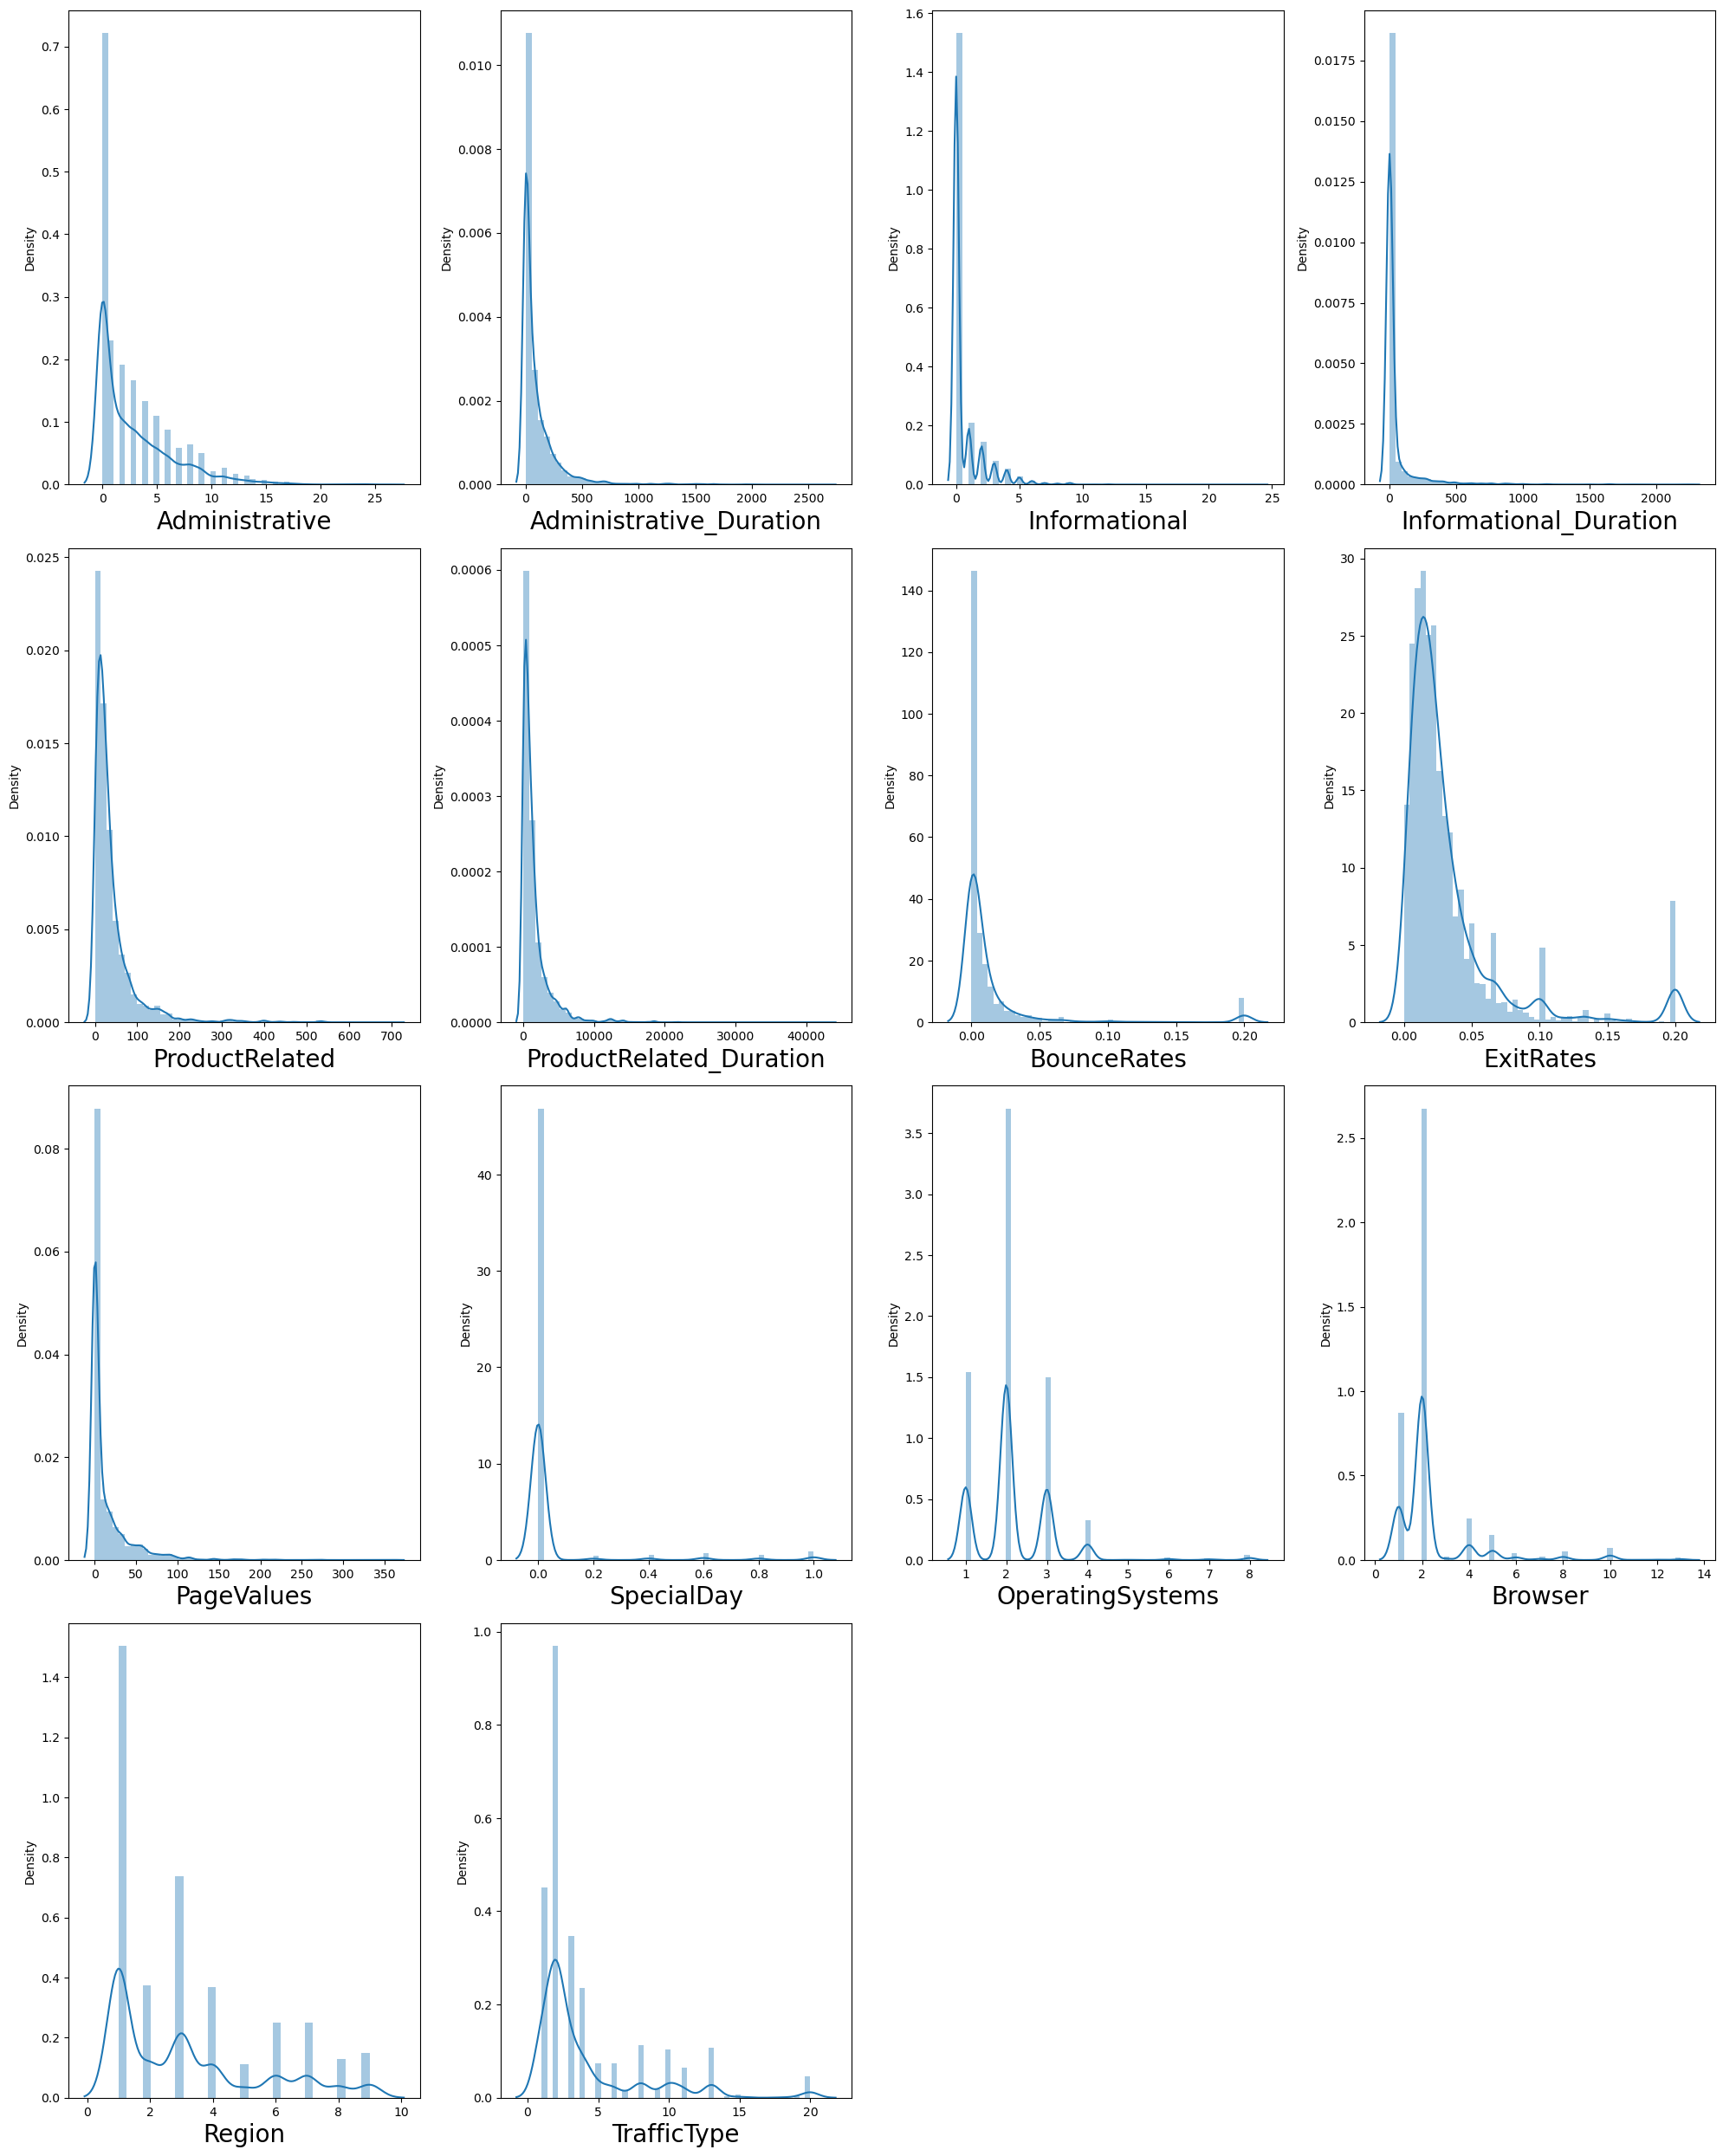

In [25]:
# checking the distribution of numerical features
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1
for column in numeric_cols:
     if plotnumber<=14:
            ax = plt.subplot(4,4,plotnumber)
            sns.distplot(numeric_cols[column])
            plt.xlabel(column,fontsize=20)
            plotnumber+=1
plt.tight_layout()         

we can see that features are skewed. So we will try to decrease the skewness.

In [26]:
data.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [27]:
# removing 2% data from the Administrative feature
q = data['Administrative'].quantile(0.98)
data_cleaned = data[data['Administrative']<q]

# removing 5% data from the Administrative_Duration feature
q = data_cleaned['Administrative_Duration'].quantile(0.95)
data_cleaned = data_cleaned[data_cleaned['Administrative_Duration']<q]

q = data_cleaned['Informational_Duration'].quantile(0.95)
data_cleaned = data_cleaned[data_cleaned['Informational_Duration']<q]

q = data_cleaned['Informational'].quantile(0.95)
data_cleaned = data_cleaned[data_cleaned['Informational']<q]

q = data_cleaned['ProductRelated'].quantile(0.98)
data_cleaned = data_cleaned[data_cleaned['ProductRelated']<q]

q = data_cleaned['ProductRelated_Duration'].quantile(0.98)
data_cleaned = data_cleaned[data_cleaned['ProductRelated_Duration']<q]

q = data_cleaned['PageValues'].quantile(0.98)
data_cleaned = data_cleaned[data_cleaned['PageValues']<q]

In [28]:
data_cleaned.shape

(9685, 18)

C:\Users\sahus\AppData\Local\Temp\ipykernel_14012\1418039454.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_cleaned[column])
C:\Users\sahus\AppData\Local\Temp\ipykernel_14012\1418039454.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_cleaned[column])


C:\Users\sahus\AppData\Local\Temp\ipykernel_14012\1418039454.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_cleaned[column])
C:\Users\sahus\AppData\Local\Temp\ipykernel_14012\1418039454.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_cleaned[column])
C:\Users\sahus\AppData\Loc

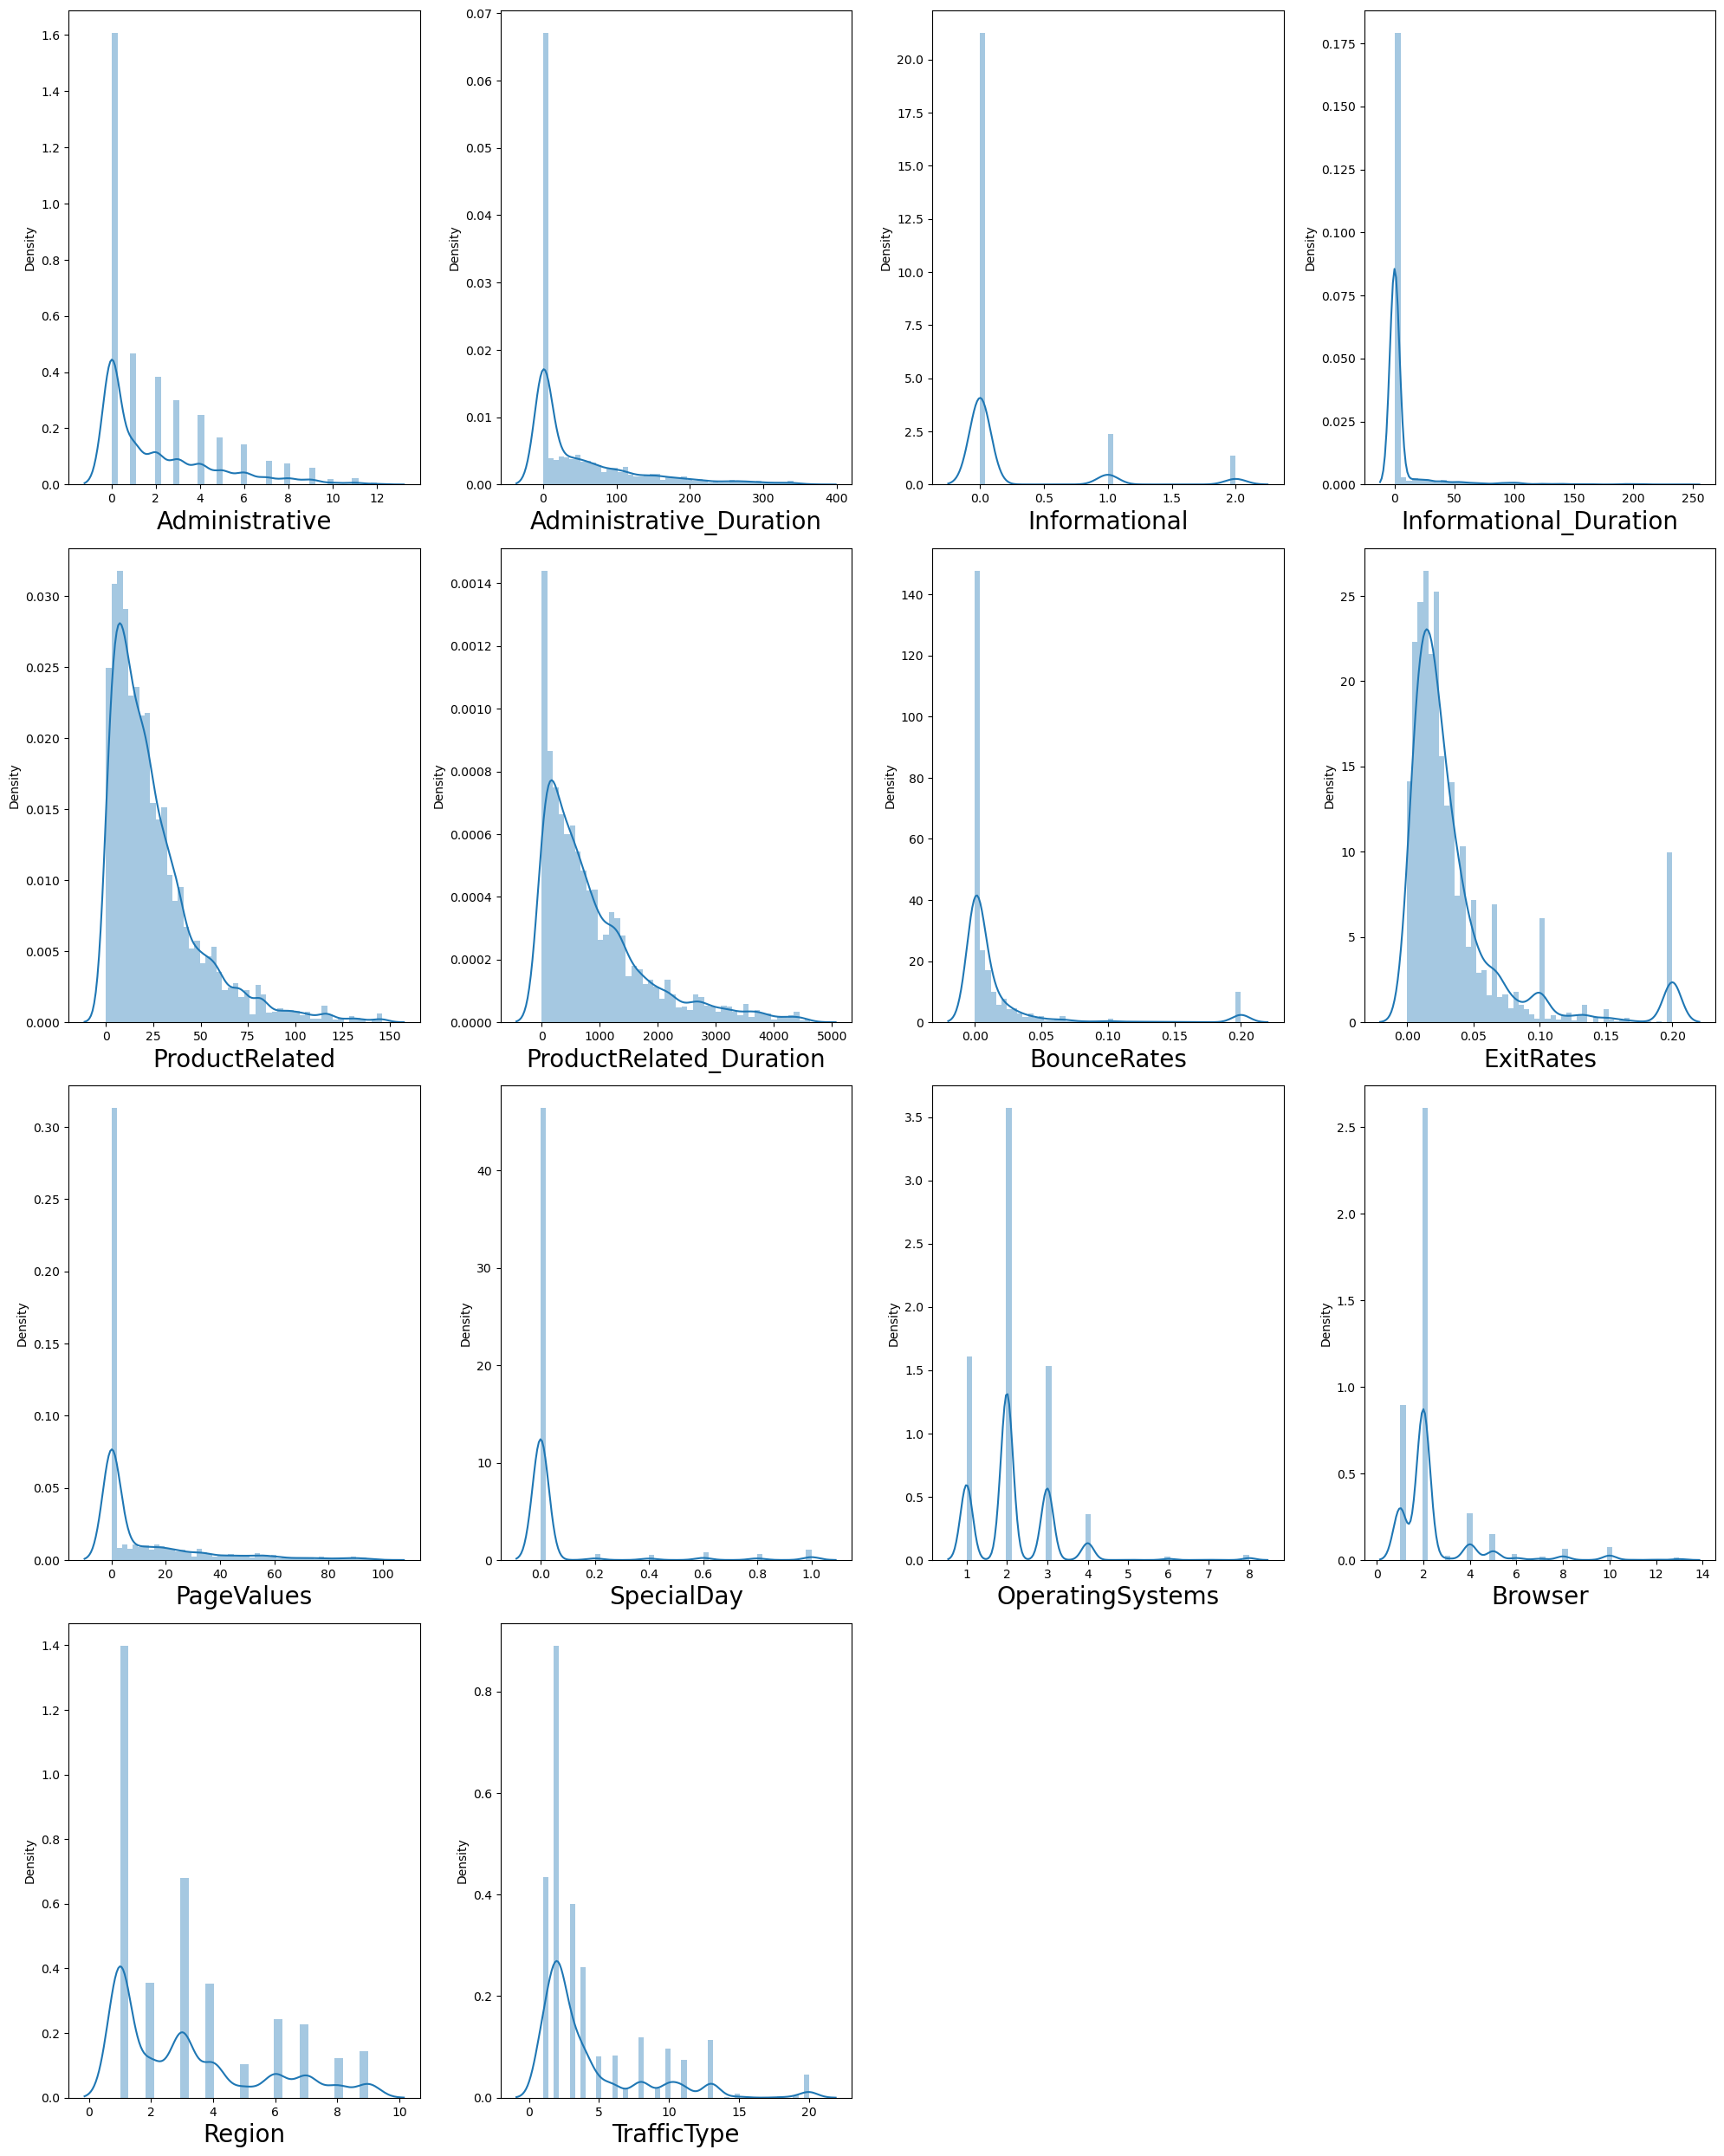

In [29]:
# checking the distribution of numerical features after handling skewness
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1
for column in numeric_cols:
     if plotnumber<=14:
            ax = plt.subplot(4,4,plotnumber)
            sns.distplot(data_cleaned[column])
            plt.xlabel(column,fontsize=20)
            plotnumber+=1
plt.tight_layout()         

As we can see skewness has reduced. The data looks much better now than before. We will start our analysis with this data now as we don't want to lose important information. If our
model doesn't work with accuracy, we will come back for more preprocessing.

In [30]:
data_cleaned.describe(include='all')

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,9685.000000,9685.000000,9685.000000,9685.000000,9685.000000,9685.000000,9685.000000,9685.000000,9685.000000,9685.000000,9685,9685.000000,9685.000000,9685.000000,9685.000000,9685,9685,9685
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,3,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Nov,NaN,NaN,NaN,NaN,Returning_Visitor,True,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2705,NaN,NaN,NaN,NaN,7799,4966,5357
mean,1.973567,51.704859,0.204543,7.113674,25.234177,901.175685,0.016656,0.036260,11.781498,0.047434,NaN,2.142179,2.382137,3.146412,4.185441,NaN,NaN,NaN
std,2.561576,75.649832,0.521512,25.533372,23.766459,908.684486,0.041663,0.042582,20.683560,0.187091,NaN,0.947900,1.799098,2.391434,3.977100,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN
25%,0.000000,0.000000,0.000000,0.000000,8.000000,229.916667,0.000000,0.012346,0.000000,0.000000,NaN,2.000000,2.000000,1.000000,2.000000,NaN,NaN,NaN
50%,1.000000,11.500000,0.000000,0.000000,19.000000,617.150000,0.000000,0.022222,0.000000,0.000000,NaN,2.000000,2.000000,3.000000,2.000000,NaN,NaN,NaN
75%,3.000000,78.000000,0.000000,0.000000,34.000000,1273.250000,0.011765,0.040000,16.880696,0.000000,NaN,3.000000,2.000000,4.000000,5.000000,NaN,NaN,NaN


### Checking for correlation between the features of the dataset

In [31]:
correlation_matrix = data_cleaned.corr()
correlation_matrix

C:\Users\sahus\AppData\Local\Temp\ipykernel_14012\520278285.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data_cleaned.corr()


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
Administrative,1.000000,0.767731,0.225896,0.178556,0.326768,0.257633,-0.203047,-0.288171,0.091125,-0.060947,0.027745,-0.009011,0.006582,-0.034701,0.048006,0.163002
Administrative_Duration,0.767731,1.000000,0.198613,0.181648,0.220572,0.207016,-0.174025,-0.255518,0.110056,-0.086637,0.033237,-0.027473,0.022421,-0.001766,0.067821,0.149861
Informational,0.225896,0.198613,1.000000,0.695237,0.257274,0.225408,-0.096970,-0.128989,0.007816,-0.005680,0.046028,-0.013759,0.002066,-0.022322,0.053175,0.076359
Informational_Duration,0.178556,0.181648,0.695237,1.000000,0.217128,0.196971,-0.072143,-0.114484,0.030322,-0.021392,0.040770,-0.016037,0.004253,-0.022306,0.036739,0.079248
ProductRelated,0.326768,0.220572,0.257274,0.217128,1.000000,0.803031,-0.237993,-0.361320,0.087704,0.008259,0.026877,0.009091,-0.032048,-0.033980,0.041323,0.170647
ProductRelated_Duration,0.257633,0.207016,0.225408,0.196971,0.803031,1.000000,-0.231640,-0.333601,0.111295,0.015360,0.044748,0.020415,-0.018699,-0.023384,0.015108,0.191118
BounceRates,-0.203047,-0.174025,-0.096970,-0.072143,-0.237993,-0.231640,1.000000,0.900682,-0.179248,0.070809,0.006935,-0.006683,-0.010483,0.073693,-0.075414,-0.255697
ExitRates,-0.288171,-0.255518,-0.128989,-0.114484,-0.361320,-0.333601,0.900682,1.000000,-0.264812,0.086897,-0.015039,-0.008935,-0.003566,0.071427,-0.091947,-0.336792
PageValues,0.091125,0.110056,0.007816,0.030322,0.087704,0.111295,-0.179248,-0.264812,1.000000,-0.072329,0.015880,0.067669,-0.053024,0.023157,0.019106,0.562734
SpecialDay,-0.060947,-0.086637,-0.005680,-0.021392,0.008259,0.015360,0.070809,0.086897,-0.072329,1.000000,-0.004726,-0.008085,0.008571,0.012047,-0.020933,-0.100237


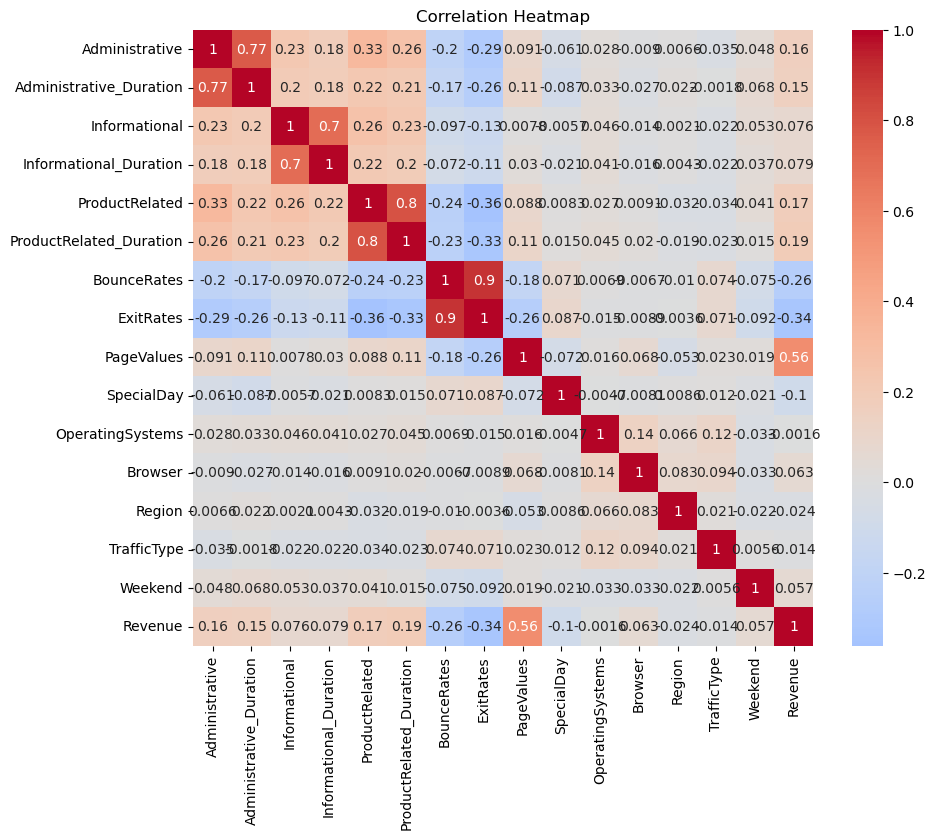

In [32]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

We can see that there are correlation betweeen some features. Let's find out those features by setting a threshold value of correlation coefficient.

C:\Users\sahus\AppData\Local\Temp\ipykernel_14012\3817836474.py:15: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  selected_features_df = df[high_correlation_features]


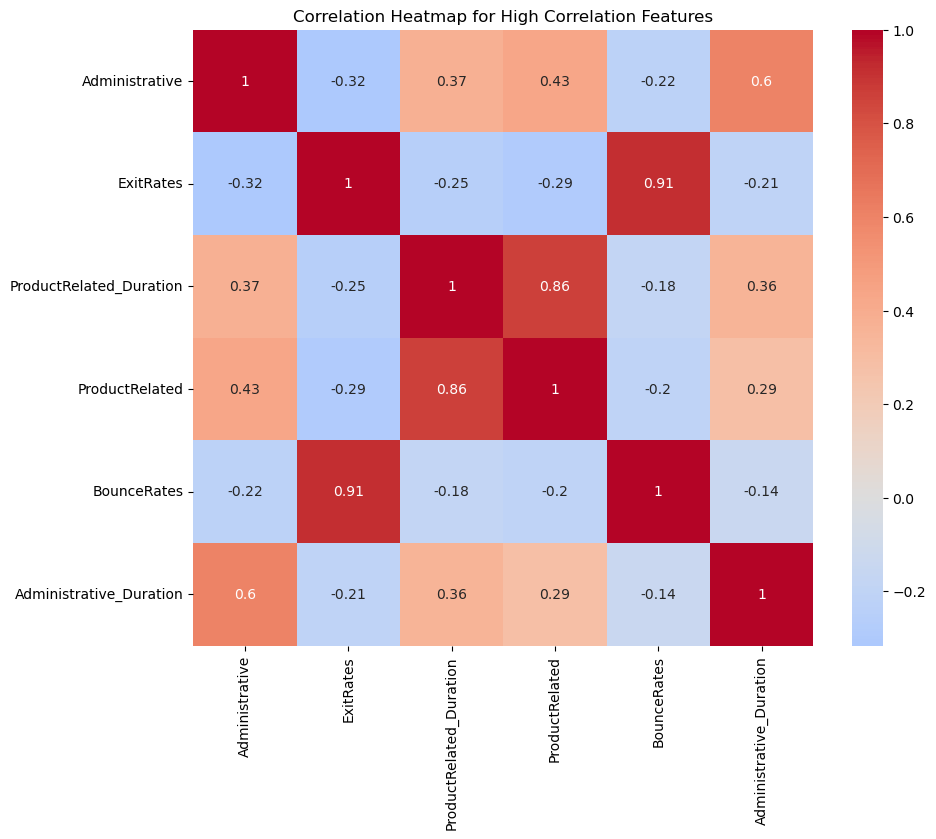

In [33]:
# Set the correlation threshold
correlation_threshold = 0.75

# Filter features based on the correlation threshold
high_correlation_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            colname_i = correlation_matrix.columns[i]
            colname_j = correlation_matrix.columns[j]
            high_correlation_features.add(colname_i)
            high_correlation_features.add(colname_j)

# Create a DataFrame with selected high correlation features
selected_features_df = df[high_correlation_features]

# Create a heatmap plot using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(selected_features_df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap for High Correlation Features')
plt.show()


As we can see that these features are highly correlated with each other. We will remove one feature from each pair to deal with multicollineariy.

In [34]:
data_cleaned.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [35]:
cols_to_remove = set(['ExitRates','ProductRelated'])

In [36]:
cols_to_use = set(data_cleaned.columns)-cols_to_remove

In [37]:
cols_to_use

{'Administrative',
 'Administrative_Duration',
 'BounceRates',
 'Browser',
 'Informational',
 'Informational_Duration',
 'Month',
 'OperatingSystems',
 'PageValues',
 'ProductRelated_Duration',
 'Region',
 'Revenue',
 'SpecialDay',
 'TrafficType',
 'VisitorType',
 'Weekend'}

In [38]:
dt = data_cleaned[list(cols_to_use)]

In [39]:
dt.head()

,BounceRates,OperatingSystems,Informational,Informational_Duration,Administrative,VisitorType,Region,ProductRelated_Duration,SpecialDay,Revenue,Month,PageValues,Administrative_Duration,Browser,Weekend,TrafficType
0,0.000000,2,0,0.0,0,Returning_Visitor,1,300.071429,0.0,True,Mar,53.989200,0.000000,2,True,11
1,0.027083,3,0,0.0,0,Returning_Visitor,3,2759.633333,0.0,False,May,0.000000,0.000000,2,False,2
2,0.017506,3,0,0.0,4,Returning_Visitor,1,2720.700000,0.0,False,May,4.858843,53.000000,2,True,13
3,0.008929,3,0,0.0,4,Returning_Visitor,1,1367.630952,0.0,True,May,50.829750,74.214286,2,True,2
4,0.000000,1,1,55.0,0,Returning_Visitor,1,936.833333,0.0,True,Mar,53.255333,0.000000,1,True,2


### Encoding categorical columns into numerical columns

In the random forest algorithm, it's generally preferable to opt for label encoding rather than using dummy variables. This preference is grounded in the inherent characteristics of the random forest algorithm and its ability to effectively handle label-encoded features. Here's why:

1. **Ordered Relationships**: Random forest algorithms work by recursively partitioning the data based on the values of individual features. Label encoding retains the ordinal relationship between different levels of a categorical feature. This means that the algorithm can inherently capture and utilize the information about the order or hierarchy within the levels.

2. **Reduced Dimensionality**: Dummy variables can lead to an increase in the dimensionality of the dataset, which can make the algorithm computationally more expensive and potentially prone to overfitting. Label encoding avoids this issue by converting categories into numerical values, reducing the dimensionality and potential computational burden.

3. **Robustness**: Random forests are robust to the effects of label encoding. The algorithm doesn't assume any specific mathematical relationship between feature values, such as magnitude or distance, making it well-suited to handle label-encoded categorical data without introducing unintended biases.


In [40]:
le = LabelEncoder()

categorical = dt.select_dtypes(include=['O','bool'])
for col in categorical.columns:
    dt[col] = le.fit_transform(dt[col])

C:\Users\sahus\AppData\Local\Temp\ipykernel_14012\3328280869.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt[col] = le.fit_transform(dt[col])
C:\Users\sahus\AppData\Local\Temp\ipykernel_14012\3328280869.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt[col] = le.fit_transform(dt[col])
C:\Users\sahus\AppData\Local\Temp\ipykernel_14012\3328280869.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [41]:
dt.head()

,BounceRates,OperatingSystems,Informational,Informational_Duration,Administrative,VisitorType,Region,ProductRelated_Duration,SpecialDay,Revenue,Month,PageValues,Administrative_Duration,Browser,Weekend,TrafficType
0,0.000000,2,0,0.0,0,2,1,300.071429,0.0,1,5,53.989200,0.000000,2,1,11
1,0.027083,3,0,0.0,0,2,3,2759.633333,0.0,0,6,0.000000,0.000000,2,0,2
2,0.017506,3,0,0.0,4,2,1,2720.700000,0.0,0,6,4.858843,53.000000,2,1,13
3,0.008929,3,0,0.0,4,2,1,1367.630952,0.0,1,6,50.829750,74.214286,2,1,2
4,0.000000,1,1,55.0,0,2,1,936.833333,0.0,1,5,53.255333,0.000000,1,1,2


In [42]:
# selecting dependent and independet features for building multi output classification model
X = dt.drop(columns = ['Revenue','Weekend'])
y = dt[['Revenue','Weekend']]      # Revenue and Weekend are output features

In [43]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20, random_state= 355)

### Applying multi output classifier

In [44]:
from sklearn.multioutput import MultiOutputClassifier
# Create a multi-output RandomForestClassifier
classifier = MultiOutputClassifier(RandomForestClassifier(n_estimators=100, random_state=42))

# Train the classifier on the resampled training data
classifier.fit(X_train, y_train)

MultiOutputClassifier(estimator=RandomForestClassifier(random_state=42))

In [45]:
classifier.score(X_test,y_test)

0.9065565307176046

In [46]:
classifier.score(X_train,y_train)

0.998580278781621

In [47]:
y_pred = classifier.predict(X_test)

In [48]:
y_pred

array([[0, 1],
       [0, 1],
       [0, 1],
       ...,
       [0, 1],
       [0, 0],
       [0, 0]], dtype=int64)

In [49]:
rand_clf = RandomForestClassifier(random_state=6)

In [50]:
rand_clf.fit(X_train,y_train)

RandomForestClassifier(random_state=6)

In [51]:
rand_clf.score(X_test,y_test)

0.9024264326277749

#### Now let's try to make prediction for some data

In [52]:
# we will try to see the prediction for these data
X.iloc[240:247,:]

,BounceRates,OperatingSystems,Informational,Informational_Duration,Administrative,VisitorType,Region,ProductRelated_Duration,SpecialDay,Month,PageValues,Administrative_Duration,Browser,TrafficType
310,0.000000,2,0,0.0,1,0,4,259.200000,0.0,9,0.000000,118.800000,2,2
312,0.200000,1,0,0.0,0,2,1,0.000000,0.0,6,0.000000,0.000000,1,15
313,0.040000,2,0,0.0,0,2,1,105.000000,0.0,6,0.000000,0.000000,2,13
315,0.000000,2,0,0.0,4,2,2,1804.011111,0.0,7,41.645902,61.633333,2,2
317,0.000000,2,0,0.0,1,0,2,1331.750000,0.0,5,33.799567,18.000000,5,3
318,0.000000,1,0,0.0,0,2,1,462.267857,0.0,7,0.000000,0.000000,1,10
320,0.007692,2,0,0.0,0,2,6,451.714286,0.0,7,0.000000,0.000000,2,11


In [53]:
y.iloc[240:247,:]    # these should be the predictions from the model

,Revenue,Weekend
310,0,0
312,0,1
313,0,0
315,1,0
317,1,0
318,0,1
320,0,0


In [54]:
# declaring the above records as a test data to get predictions from the model
test_data = X.iloc[240:247,:]

In [55]:
classifier.predict(test_data)

array([[0, 0],
       [0, 1],
       [0, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 0]], dtype=int64)

These are the predictions from the model. The model predicted correclty for all the data we selected, which is great.